In [155]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [156]:
df_train = pd.read_csv('./../data/train.csv')
df_train.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Male,23.170309,1.707557,75.306702,yes,2.303367,1.277636,Sometimes,no,3.042774,Sometimes,yes,no,0.944982,0.366126,Public_Transportation,Body Level 3
1,Female,39.965474,1.739293,80.914382,yes,2.416044,1.352649,Sometimes,no,3.196043,Sometimes,no,no,0.148628,1.082660,Automobile,Body Level 3
2,Female,19.000000,1.650000,56.000000,yes,3.000000,3.000000,Frequently,yes,3.000000,Frequently,yes,yes,1.000000,2.000000,Public_Transportation,Body Level 2
3,Female,18.297229,1.637396,70.000000,yes,2.000000,2.326165,no,no,1.999014,Sometimes,yes,no,0.007050,0.000000,Public_Transportation,Body Level 3
4,Male,18.701766,1.704908,81.384224,yes,2.650629,1.708083,Sometimes,no,1.000000,Sometimes,yes,no,1.876051,0.938791,Public_Transportation,Body Level 3


In [157]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('Body_Level')
df_train[categorical_columns].head()

,Gender,H_Cal_Consump,Alcohol_Consump,Smoking,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Transport
0,Male,yes,Sometimes,no,Sometimes,yes,no,Public_Transportation
1,Female,yes,Sometimes,no,Sometimes,no,no,Automobile
2,Female,yes,Frequently,yes,Frequently,yes,yes,Public_Transportation
3,Female,yes,no,no,Sometimes,yes,no,Public_Transportation
4,Male,yes,Sometimes,no,Sometimes,yes,no,Public_Transportation


#### Using one hot encoding for categorical features

In [158]:
encoder = OneHotEncoder()
encoder.fit(df_train[categorical_columns])
encoded_columns = encoder.transform(df_train[categorical_columns])
encoded_columns

# drop categorical columns from the dataframe and add encoded columns
df_train = df_train.drop(categorical_columns, axis=1)

In [159]:
encoded_columns.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [160]:
df_train = pd.concat([df_train, pd.DataFrame(encoded_columns.toarray(), columns=encoder. get_feature_names_out(categorical_columns))], axis=1)
df_train.head()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,...,Food_Between_Meals_no,Fam_Hist_no,Fam_Hist_yes,H_Cal_Burn_no,H_Cal_Burn_yes,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,23.170309,1.707557,75.306702,2.303367,1.277636,3.042774,0.944982,0.366126,Body Level 3,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,39.965474,1.739293,80.914382,2.416044,1.352649,3.196043,0.148628,1.082660,Body Level 3,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,19.000000,1.650000,56.000000,3.000000,3.000000,3.000000,1.000000,2.000000,Body Level 2,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,18.297229,1.637396,70.000000,2.000000,2.326165,1.999014,0.007050,0.000000,Body Level 3,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18.701766,1.704908,81.384224,2.650629,1.708083,1.000000,1.876051,0.938791,Body Level 3,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Applying the preprocessing steps to the validation data

In [161]:
df_validation = pd.read_csv('./../data/val.csv')
# use the same encoder to encode the validation data
encoded_columns = encoder.transform(df_validation[categorical_columns])
df_validation = df_validation.drop(categorical_columns, axis=1)
df_validation = pd.concat([df_validation, pd.DataFrame(encoded_columns.toarray(), columns=encoder. get_feature_names_out(categorical_columns))], axis=1)
df_validation.head()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,...,Food_Between_Meals_no,Fam_Hist_no,Fam_Hist_yes,H_Cal_Burn_no,H_Cal_Burn_yes,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,18.000000,1.580000,48.000000,2.000000,2.000000,3.0,1.000000,0.000000,Body Level 2,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,23.000000,1.835643,58.854416,3.000000,2.027984,3.0,1.661556,0.114716,Body Level 1,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,26.208134,1.700000,78.041338,2.784383,2.165605,3.0,0.855973,0.839659,Body Level 3,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,23.000000,1.800000,90.000000,1.000000,2.000000,3.0,0.000000,2.000000,Body Level 3,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,23.000000,1.660000,60.000000,2.000000,2.000000,3.0,3.000000,0.000000,Body Level 2,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [162]:
y_train = df_train['Body_Level']
x_train = df_train.drop(['Body_Level'], axis=1)
y_validation = df_validation['Body_Level']
x_validation = df_validation.drop(['Body_Level'], axis=1)

### I will attempt to plot the accuracy of the model as a function of the regularization parameter alpha using two methods:
1. Manually looping through a range of alpha values and plotting the accuracy
2. Using the RidgeClassifierCV function to automatically find the best alpha value and plotting the accuracy while using leave-one-out cross validation

{1e-05: 0.7398648648648649, 0.0001: 0.7398648648648649, 0.001: 0.7398648648648649, 0.01: 0.7398648648648649, 0.1: 0.7398648648648649, 0.5: 0.7364864864864865, 1: 0.7331081081081081}


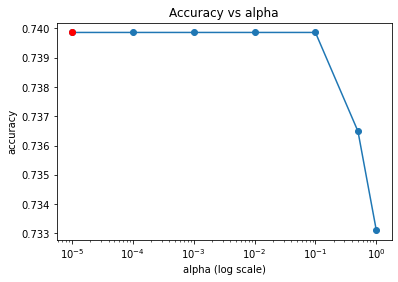

In [163]:
# Create a list of alpha values
# alphas = np.logspace(-4, 4, 10)
alphas = [0.00001,0.0001,0.001,0.01,0.1, 0.5, 1]

# Train a ridge classifier for each alpha value
models = []
for alpha in alphas:
    model = RidgeClassifier(alpha=alpha)
    model.fit(x_train, y_train)
    models.append(model)

# Get the mean accuracy for each alpha value
accuracies = []
for model in models:
    y_pred = model.predict(x_validation)
    accuracies.append(model.score(x_validation, y_validation))

best_aplha = alphas[np.argmax(accuracies)]

# print a dictionary of alpha values and their mean accuracies
print(dict(zip(alphas, accuracies)))


# make the x axis log scale
plt.plot(alphas, accuracies, 'o-')
plt.plot(best_aplha, accuracies[np.argmax(accuracies)], 'ro')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('accuracy')
plt.title('Accuracy vs alpha')
plt.show()

Accuracy:  0.7364864864864865
Precision:  0.6502656096763648
Recall:  0.6231967787114846
F1-Score:  0.6083516483516483
Best alpha:  0.5


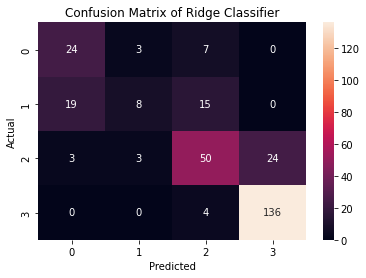

In [164]:
alphas = [0.001,0.01, 0.1, 0.5, 1, 5, 10]
# store_cv_values=True to store the cross validation values for each alpha
# MUST use leave-one-out cross validation for alpha selection
model = RidgeClassifierCV(alphas=alphas, store_cv_values=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_validation)
print('Accuracy: ', accuracy_score(y_validation, y_pred))
print('Precision: ', precision_score(y_validation, y_pred, average='macro'))
print('Recall: ', recall_score(y_validation, y_pred, average='macro'))
print('F1-Score: ', f1_score(y_validation, y_pred, average='macro'))
print('Best alpha: ', model.alpha_)
cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Ridge Classifier')
plt.show()
# print the best alpha